In [1]:
from sagemaker import get_execution_role

role = get_execution_role()
bucket = 'sagemaker-psn5' # Use the name of your s3 bucket here

In [2]:
role

'arn:aws:iam::993741996993:role/service-role/AmazonSageMaker-ExecutionRole-20190417T180390'

In [3]:
%%time
import pickle, gzip, numpy, urllib.request, json

# Load the dataset
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

CPU times: user 877 ms, sys: 336 ms, total: 1.21 s
Wall time: 2.16 s


In [6]:
train_set[0].shape

(50000, 784)

In [13]:
train_set[1]

array([5, 0, 4, ..., 8, 4, 8])

In [8]:
from sklearn.decomposition import  PCA
from sklearn import preprocessing

In [9]:
pca = PCA(n_components=100, svd_solver='full')
pca.fit(train_set[0])

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [10]:
X_pca= pca.fit_transform(train_set[0])

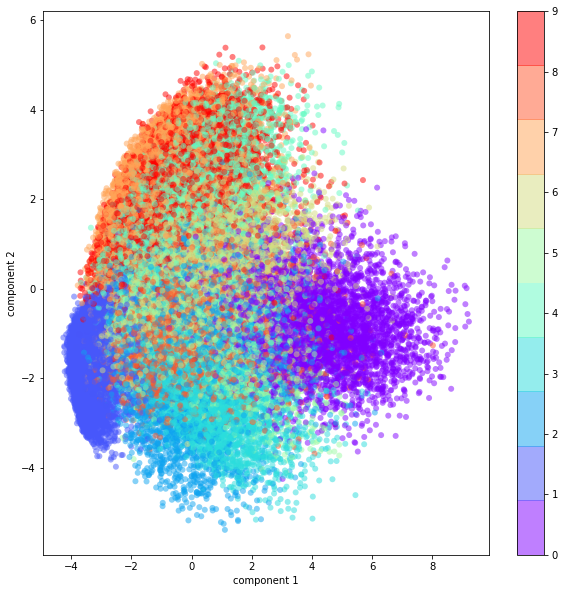

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=train_set[1], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();